In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
import xgboost as xgb


In [2]:
dataset = pd.read_excel('desktop/ilk_otuz_shipment.xlsx',sheet_name= 'pre_mart')
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km
0,YO6VH7AE,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,7.3367,6.7504,1.086854,729.00,107.99,99.36,NaN,Ä°stanbul_Ardahan,NaN
1,7X45FHSB,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,7.3367,6.7504,1.086854,216.00,32.00,29.44,NaN,Ä°stanbul_Ankara,443.9
2,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.0,...,NaN,7.3367,6.7504,1.086854,1668.00,247.10,227.35,NaN,Ä°stanbul_IÄŸdÄ±r,NaN
3,O43HKT0V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,7.3367,6.7504,1.086854,499.00,73.92,68.01,NaN,Ä°stanbul_Kars,NaN
4,0BOTO0G4,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,7.3367,6.7504,1.086854,429.00,63.55,58.47,NaN,Ä°stanbul_Bayburt,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48376,SAS47P63,TRY,DELIVERED,NaN,NaN,2022-03-02 06:44:14.976,2022-02-28 10:46:59.410,Y22-2437,621ca81d985b6c7a437899d5,15000.0,...,277.91,15.5002,13.8535,1.118865,3883.00,280.29,250.51,1.0,Ä°zmir_Kocaeli,NaN
48377,JP610Q9M,TRY,DELIVERED,NaN,606ae737ad17691d3bdb3eba,2022-03-03 10:20:43.380,2022-02-28 14:04:40.286,40867975,NaN,31.2,...,2.71,15.5002,13.8535,1.118865,184.45,13.31,11.90,2.0,Kocaeli_Bursa,NaN
48378,AQJFAY5M,TRY,DELIVERED,NaN,NaN,2022-02-28 07:40:14.331,2022-02-28 07:19:35.112,5183242439,NaN,128.0,...,3.21,15.5002,13.8535,1.118865,183.85,13.27,11.86,1.0,Ä°stanbul_Ä°stanbul,1.0
48379,S5WNFD2Z,TRY,DELIVERED,NaN,NaN,2022-03-02 21:13:51.289,2022-02-28 12:50:32.417,5183246451,NaN,128.0,...,17.36,15.5002,13.8535,1.118865,183.85,13.27,11.86,2.0,Ä°stanbul_Ankara,443.9


In [3]:
price_data = pd.read_excel('desktop/shipment.xlsx',sheet_name = 'Sheet1')
price_data

,İl,İlçe,Tarih,kursunsuz_v_max,pro_dizel,V/MAX Dizel 10,Gazyağı,Kalorifer Yakıtı,%1 Kükürtlü Fuel Oil
0,İstanbul,BUYUKCEKMECE,2020-03-01,6.59 TL,6.2 TL,6.24 TL,5.1 TL,4 TL,3.93 TL
1,İstanbul,BUYUKCEKMECE,2020-03-03,6.59 TL,6.2 TL,6.24 TL,5.1 TL,3.95 TL,3.85 TL
2,İstanbul,BUYUKCEKMECE,2020-03-04,6.59 TL,6.2 TL,6.24 TL,5.1 TL,4.04 TL,3.94 TL
3,İstanbul,BUYUKCEKMECE,2020-03-10,6.59 TL,6.2 TL,6.24 TL,5.1 TL,3.67 TL,3.56 TL
4,İstanbul,BUYUKCEKMECE,2020-03-11,5.99 TL,5.65 TL,5.69 TL,4.47 TL,3.2 TL,3.06 TL
...,...,...,...,...,...,...,...,...,...
432,İstanbul,BUYUKCEKMECE,2022-03-09,20.35 TL,22.81 TL,22.84 TL,20.9 TL,18.91 TL,16.48 TL
433,İstanbul,BUYUKCEKMECE,2022-03-10,20.35 TL,22.81 TL,22.84 TL,22.95 TL,20.36 TL,17.38 TL
434,İstanbul,BUYUKCEKMECE,2022-03-11,20.38 TL,22.86 TL,22.89 TL,20.93 TL,19.06 TL,16.68 TL
435,İstanbul,BUYUKCEKMECE,2022-03-12,20.38 TL,22.86 TL,22.89 TL,18.65 TL,17.77 TL,16.24 TL


In [4]:
data = pd.concat([price_data.Tarih.astype(str), price_data.kursunsuz_v_max, price_data.pro_dizel], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tarih            437 non-null    object
 1   kursunsuz_v_max  437 non-null    object
 2   pro_dizel        437 non-null    object
dtypes: object(3)
memory usage: 10.4+ KB


In [5]:
dataset['Tarih']= dataset.pickup_start_date.str[:-13]
dataset['Tarih']

0        2020-04-09
1        2020-04-09
2        2020-04-09
3        2020-04-09
4        2020-04-09
            ...    
48376    2022-02-28
48377    2022-02-28
48378    2022-02-28
48379    2022-02-28
48380    2022-02-28
Name: Tarih, Length: 48381, dtype: object

In [6]:
inner_join = pd.merge(dataset, 
                      data, 
                      on ='Tarih', 
                      how ='inner')

In [7]:
inner_join

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
0,YO6VH7AE,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.0,...,1.086854,729.0,107.99,99.36,NaN,Ä°stanbul_Ardahan,NaN,2020-04-09,5.22 TL,5.45 TL
1,YO6VH7AE,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.0,...,1.086854,729.0,107.99,99.36,NaN,Ä°stanbul_Ardahan,NaN,2020-04-09,5.22 TL,5.45 TL
2,7X45FHSB,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,1.086854,216.0,32.00,29.44,NaN,Ä°stanbul_Ankara,443.9,2020-04-09,5.22 TL,5.45 TL
3,7X45FHSB,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,1.086854,216.0,32.00,29.44,NaN,Ä°stanbul_Ankara,443.9,2020-04-09,5.22 TL,5.45 TL
4,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.0,...,1.086854,1668.0,247.10,227.35,NaN,Ä°stanbul_IÄŸdÄ±r,NaN,2020-04-09,5.22 TL,5.45 TL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28729,J75ZLM26,TRY,CANCELED,NaN,NaN,2022-02-28 07:36:19.688,2022-02-24 11:30:02.000,NaN,NaN,19000.0,...,1.121574,3500.0,245.48,218.87,NaN,Ankara_Sakarya,NaN,2022-02-26,16.77 TL,17 TL
28730,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,1.121574,5400.0,378.73,337.68,1.0,Manisa_Ä°stanbul,NaN,2022-02-26,16.77 TL,17 TL
28731,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,1.121574,5400.0,378.73,337.68,1.0,Manisa_Ä°stanbul,NaN,2022-02-26,16.77 TL,17 TL
28732,AVO6QRZW,TRY,DELIVERED,NaN,NaN,2022-02-26 08:52:32.826,2022-02-26 08:17:30.640,NaN,6219e2194a36822d100072f0,10000.0,...,1.121574,4200.0,294.57,262.64,1.0,Manisa_Ä°stanbul,NaN,2022-02-26,16.77 TL,17 TL


In [8]:
inner_join['kursunsuz_v_max'] = inner_join['kursunsuz_v_max'].str[:-2]
inner_join['kursunsuz_v_max']

0         5.22 
1         5.22 
2         5.22 
3         5.22 
4         5.22 
          ...  
28729    16.77 
28730    16.77 
28731    16.77 
28732    16.77 
28733    16.77 
Name: kursunsuz_v_max, Length: 28734, dtype: object

In [9]:
inner_join['pro_dizel'] = inner_join['pro_dizel'].str[:-2]
inner_join['pro_dizel']

0        5.45 
1        5.45 
2        5.45 
3        5.45 
4        5.45 
         ...  
28729      17 
28730      17 
28731      17 
28732      17 
28733      17 
Name: pro_dizel, Length: 28734, dtype: object

In [10]:
inner_join['pro_dizel'] = inner_join.pro_dizel.astype(float)
inner_join.kursunsuz_v_max = inner_join.kursunsuz_v_max.astype(float)
inner_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28734 entries, 0 to 28733
Data columns (total 89 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          28734 non-null  object 
 1   value_currency                              28734 non-null  object 
 2   latest_status                               28734 non-null  object 
 3   shipper_note                                3218 non-null   object 
 4   updatedby                                   22662 non-null  object 
 5   updatedat                                   28734 non-null  object 
 6   createdat                                   28734 non-null  object 
 7   order_id                                    10066 non-null  object 
 8   pricing_id                                  19740 non-null  object 
 9   totalkgds                                   28734 non-null  float64
 10  pickup_sta

In [11]:
dataset = inner_join
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
0,YO6VH7AE,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.0,...,1.086854,729.0,107.99,99.36,NaN,Ä°stanbul_Ardahan,NaN,2020-04-09,5.22,5.45
1,YO6VH7AE,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.0,...,1.086854,729.0,107.99,99.36,NaN,Ä°stanbul_Ardahan,NaN,2020-04-09,5.22,5.45
2,7X45FHSB,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,1.086854,216.0,32.00,29.44,NaN,Ä°stanbul_Ankara,443.9,2020-04-09,5.22,5.45
3,7X45FHSB,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,1.086854,216.0,32.00,29.44,NaN,Ä°stanbul_Ankara,443.9,2020-04-09,5.22,5.45
4,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.0,...,1.086854,1668.0,247.10,227.35,NaN,Ä°stanbul_IÄŸdÄ±r,NaN,2020-04-09,5.22,5.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28729,J75ZLM26,TRY,CANCELED,NaN,NaN,2022-02-28 07:36:19.688,2022-02-24 11:30:02.000,NaN,NaN,19000.0,...,1.121574,3500.0,245.48,218.87,NaN,Ankara_Sakarya,NaN,2022-02-26,16.77,17.00
28730,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,1.121574,5400.0,378.73,337.68,1.0,Manisa_Ä°stanbul,NaN,2022-02-26,16.77,17.00
28731,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,1.121574,5400.0,378.73,337.68,1.0,Manisa_Ä°stanbul,NaN,2022-02-26,16.77,17.00
28732,AVO6QRZW,TRY,DELIVERED,NaN,NaN,2022-02-26 08:52:32.826,2022-02-26 08:17:30.640,NaN,6219e2194a36822d100072f0,10000.0,...,1.121574,4200.0,294.57,262.64,1.0,Manisa_Ä°stanbul,NaN,2022-02-26,16.77,17.00


In [12]:
dataset = dataset[dataset.total_cost_amount_in_tl > 10]
#dataset = dataset[dataset.total_cost_amount_in_tl < 10000]

In [13]:
# Get Delivered Shipments
accepted = ('APPROVED', 'IN_TRANSIT', 'IN_DELIVERY', 'IN_CROSSDOCK', 'DELIVERED', 'IN_PICKUP')

dataset = dataset[dataset.latest_status.isin(accepted)]
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
2452,7B67CBV5,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:32:01.175,2020-12-29 07:58:12.796,NaN,5feae18db973bb2a9e4fa09e,720.0,...,1.224591,300.0,40.43,33.02,1.0,Ä°stanbul_Yalova,NaN,2020-12-29,7.18,6.57
2453,7B67CBV5,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:32:01.175,2020-12-29 07:58:12.796,NaN,5feae18db973bb2a9e4fa09e,720.0,...,1.224591,300.0,40.43,33.02,1.0,Ä°stanbul_Yalova,NaN,2020-12-29,7.18,6.57
2906,A437BSLV,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:34:52.342,2021-01-14 19:48:45.153,NaN,60009fbe49885878b863095f,480.0,...,1.215596,150.0,20.27,16.67,1.0,Kocaeli_Ä°zmir,461.8,2021-01-14,7.20,6.59
2907,A437BSLV,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:34:52.342,2021-01-14 19:48:45.153,NaN,60009fbe49885878b863095f,480.0,...,1.215596,150.0,20.27,16.67,1.0,Kocaeli_Ä°zmir,461.8,2021-01-14,7.20,6.59
2946,9SW0FTNN,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:34:40.770,2021-01-14 19:48:45.133,NaN,60009fbe49885878b863095f,480.0,...,1.215596,150.0,20.27,16.67,1.0,Kocaeli_Ä°zmir,461.8,2021-01-14,7.20,6.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28727,OBTL48W8,TRY,DELIVERED,NaN,NaN,2022-02-25 14:27:07.789,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,1.121574,6476.0,454.20,404.97,1.0,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
28730,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,1.121574,5400.0,378.73,337.68,1.0,Manisa_Ä°stanbul,NaN,2022-02-26,16.77,17.00
28731,S6RF5HCR,TRY,DELIVERED,NaN,NaN,2022-02-28 09:33:07.955,2022-02-26 08:15:37.545,NaN,6219e19e4a36822d100072ef,10000.0,...,1.121574,5400.0,378.73,337.68,1.0,Manisa_Ä°stanbul,NaN,2022-02-26,16.77,17.00
28732,AVO6QRZW,TRY,DELIVERED,NaN,NaN,2022-02-26 08:52:32.826,2022-02-26 08:17:30.640,NaN,6219e2194a36822d100072f0,10000.0,...,1.121574,4200.0,294.57,262.64,1.0,Manisa_Ä°stanbul,NaN,2022-02-26,16.77,17.00


In [14]:
# GET pickup and dropoffs
routes = ('Bursa_Kocaeli', 'İzmir_Balıkesir', 'Konya_Afyonkarahisar', 'Afyonkarahisar_Afyonkarahisar', 'Kocaeli_Kocaeli', 'Bursa_Bursa', 'Bursa_Balıkesir', 'Kocaeli_Erzurum','Balıkesir_Balıkesir','İstanbul_İstanbul','Kocaeli_İstanbul','Kayseri_Afyonkarahisar','İstanbul_İzmir','Burdur_Bolu','Kocaeli_Malatya','Manisa_Balıkesir','İstanbul_Kocaeli','Balıkesir_Bursa','Hatay_Osmaniye','Kocaeli_İzmir','Sakarya_Kocaeli','İstanbul_Ankara','Bursa_Kayseri','Bursa_İstanbul','Bursa_İzmir', 'Yozgat_Afyonkarahisar', 'Bursa_Afyonkarahisar','İzmir_Afyonkarahisar', 'Bitlis_Afyonkarahisar','Sivas_Afyonkarahisar')
#routes = (['İstanbul_İstanbul'])
dataset = dataset[dataset.routes.isin(routes)]
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
4356,NHGEFONQ,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:46:55.990,2021-03-09 13:38:01.391,KTL377341,60477a3694d0517d46f80f25,25000.0,...,1.189117,3300.0,431.15,362.58,1.0,Bursa_Kayseri,665.9,2021-03-09,7.25,6.62
4357,NHGEFONQ,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:46:55.990,2021-03-09 13:38:01.391,KTL377341,60477a3694d0517d46f80f25,25000.0,...,1.189117,3300.0,431.15,362.58,1.0,Bursa_Kayseri,665.9,2021-03-09,7.25,6.62
5328,ZHVZCVPE,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:59:34.177,2021-03-17 21:00:17.215,KTL378348,60526dde9b44e45a023ded2d,25000.0,...,1.194972,1300.0,174.01,145.62,1.0,Bursa_Kocaeli,132.4,2021-03-18,7.07,6.43
5329,ZHVZCVPE,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:59:34.177,2021-03-17 21:00:17.215,KTL378348,60526dde9b44e45a023ded2d,25000.0,...,1.194972,1300.0,174.01,145.62,1.0,Bursa_Kocaeli,132.4,2021-03-18,7.07,6.43
5438,FSA53WNT,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:40:23.683,2021-03-24 06:22:13.133,NaN,605ada907214893103253b08,4800.0,...,1.183162,425.0,53.25,45.01,1.0,Kocaeli_Kocaeli,1.0,2021-03-24,7.07,6.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28715,CGK5O6IM,TRY,DELIVERED,NaN,NaN,2022-02-25 20:09:40.445,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,1.121574,6476.0,454.20,404.97,1.0,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
28720,3TT41XI4,TRY,DELIVERED,NaN,NaN,2022-03-01 21:57:31.773,2022-02-25 12:32:14.700,NaN,6218cc4bfa2c1f79a0804f4a,25000.0,...,1.121574,2000.0,140.27,125.07,1.0,Bursa_Kocaeli,132.4,2022-02-26,16.77,17.00
28721,3TT41XI4,TRY,DELIVERED,NaN,NaN,2022-03-01 21:57:31.773,2022-02-25 12:32:14.700,NaN,6218cc4bfa2c1f79a0804f4a,25000.0,...,1.121574,2000.0,140.27,125.07,1.0,Bursa_Kocaeli,132.4,2022-02-26,16.77,17.00
28726,OBTL48W8,TRY,DELIVERED,NaN,NaN,2022-02-25 14:27:07.789,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,1.121574,6476.0,454.20,404.97,1.0,Burdur_Bolu,566.4,2022-02-26,16.77,17.00


In [15]:
#Split Data by Shipment Type
dataset = dataset[dataset.shipment_type == 'FTL']
orj_data = dataset
dataset


,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
7030,1MJ5KNDS,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:28:01.739,2021-05-20 06:39:31.307,NaN,60a6041b826c7869898b2188,25000.0,...,1.219299,1300.0,155.06,127.17,1.0,Bursa_Kocaeli,132.4,2021-05-20,7.73,7.21
7031,1MJ5KNDS,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:28:01.739,2021-05-20 06:39:31.307,NaN,60a6041b826c7869898b2188,25000.0,...,1.219299,1300.0,155.06,127.17,1.0,Bursa_Kocaeli,132.4,2021-05-20,7.73,7.21
7036,RPAMYVYS,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:50:47.709,2021-05-20 06:39:31.307,NaN,60a6041b826c7869898b2188,25000.0,...,1.219299,1500.0,178.91,146.73,1.0,Bursa_Kocaeli,132.4,2021-05-20,7.73,7.21
7037,RPAMYVYS,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:50:47.709,2021-05-20 06:39:31.307,NaN,60a6041b826c7869898b2188,25000.0,...,1.219299,1500.0,178.91,146.73,1.0,Bursa_Kocaeli,132.4,2021-05-20,7.73,7.21
7046,VGCZFJU1,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 15:56:22.566,2021-05-20 06:39:31.307,NaN,60a6041b826c7869898b2188,25000.0,...,1.219299,1500.0,178.91,146.73,1.0,Bursa_Kocaeli,132.4,2021-05-20,7.73,7.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28715,CGK5O6IM,TRY,DELIVERED,NaN,NaN,2022-02-25 20:09:40.445,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,1.121574,6476.0,454.20,404.97,1.0,Burdur_Bolu,566.4,2022-02-26,16.77,17.00
28720,3TT41XI4,TRY,DELIVERED,NaN,NaN,2022-03-01 21:57:31.773,2022-02-25 12:32:14.700,NaN,6218cc4bfa2c1f79a0804f4a,25000.0,...,1.121574,2000.0,140.27,125.07,1.0,Bursa_Kocaeli,132.4,2022-02-26,16.77,17.00
28721,3TT41XI4,TRY,DELIVERED,NaN,NaN,2022-03-01 21:57:31.773,2022-02-25 12:32:14.700,NaN,6218cc4bfa2c1f79a0804f4a,25000.0,...,1.121574,2000.0,140.27,125.07,1.0,Bursa_Kocaeli,132.4,2022-02-26,16.77,17.00
28726,OBTL48W8,TRY,DELIVERED,NaN,NaN,2022-02-25 14:27:07.789,2022-02-24 14:05:55.463,NaN,621790b87f725a14629d28ff,25000.0,...,1.121574,6476.0,454.20,404.97,1.0,Burdur_Bolu,566.4,2022-02-26,16.77,17.00


In [16]:
# Get Applicable Columns
dataset = pd.concat([dataset['latest_status'],dataset['totalkgds'],dataset['pickup_city'],dataset['dropoff_city'] ,dataset['pickup_address_type'], dataset['dropoff_address_type'],
                  dataset['category'], dataset['price_type'], 
                  dataset['shipment_type'], dataset['vehicle_type'],dataset['vehicle_body_type'],
                  dataset['vehicle_package_type'], dataset['vehicle_way_of_loading'],
                  dataset['vehicle_tonnage_per_vehicle'],dataset['payment_option'],
                  dataset['invoice_type'], dataset['tenant_signup_flow'], 
                  dataset['total_cost_amount_in_tl'], dataset['usd_tl'],
                  dataset['price_base_amount_in_tl']
                 ,dataset['routes'], dataset['km'],dataset['kursunsuz_v_max'],dataset['pro_dizel']], axis = 1)
dataset

,latest_status,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,price_type,shipment_type,vehicle_type,...,payment_option,invoice_type,tenant_signup_flow,total_cost_amount_in_tl,usd_tl,price_base_amount_in_tl,routes,km,kursunsuz_v_max,pro_dizel
7030,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,1200.0,8.384,1300.0,Bursa_Kocaeli,132.4,7.73,7.21
7031,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,1200.0,8.384,1300.0,Bursa_Kocaeli,132.4,7.73,7.21
7036,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,1350.0,8.384,1500.0,Bursa_Kocaeli,132.4,7.73,7.21
7037,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,1350.0,8.384,1500.0,Bursa_Kocaeli,132.4,7.73,7.21
7046,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,1500.0,8.384,1500.0,Bursa_Kocaeli,132.4,7.73,7.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28715,DELIVERED,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,6000.0,14.258,6476.0,Burdur_Bolu,566.4,16.77,17.00
28720,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,AGRICULTURE,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,2000.0,14.258,2000.0,Bursa_Kocaeli,132.4,16.77,17.00
28721,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,AGRICULTURE,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,2000.0,14.258,2000.0,Bursa_Kocaeli,132.4,16.77,17.00
28726,DELIVERED,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,6000.0,14.258,6476.0,Burdur_Bolu,566.4,16.77,17.00


In [17]:
dataset = dataset.drop(columns = 'shipment_type')
dataset = dataset.drop(columns = 'latest_status')
dataset = dataset.drop(columns = 'price_base_amount_in_tl')
dataset = dataset.drop(columns = 'price_type')
dataset = dataset.drop(columns = 'payment_option')
dataset = dataset.drop(columns = 'invoice_type')
dataset = dataset.drop(columns = 'tenant_signup_flow')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 7030 to 28727
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    1700 non-null   float64
 1   pickup_city                  1700 non-null   object 
 2   dropoff_city                 1700 non-null   object 
 3   pickup_address_type          1700 non-null   object 
 4   dropoff_address_type         1700 non-null   object 
 5   category                     1700 non-null   object 
 6   vehicle_type                 1700 non-null   object 
 7   vehicle_body_type            1700 non-null   object 
 8   vehicle_package_type         1696 non-null   object 
 9   vehicle_way_of_loading       1700 non-null   object 
 10  vehicle_tonnage_per_vehicle  1700 non-null   float64
 11  total_cost_amount_in_tl      1700 non-null   float64
 12  usd_tl                       1700 non-null   float64
 13  routes        

In [18]:
labelencoder = LabelEncoder()
dataset['category'] = labelencoder.fit_transform(dataset['category'])
dataset['vehicle_type'] = labelencoder.fit_transform(dataset['vehicle_type'])
dataset['vehicle_body_type'] = labelencoder.fit_transform(dataset['vehicle_body_type'])
dataset['vehicle_package_type'] = labelencoder.fit_transform(dataset['vehicle_package_type'])
dataset['vehicle_way_of_loading'] = labelencoder.fit_transform(dataset['vehicle_way_of_loading'])
dataset['pickup_address_type'] = labelencoder.fit_transform(dataset['pickup_address_type'])
dataset['dropoff_address_type'] = labelencoder.fit_transform(dataset['dropoff_address_type'])
dataset['routes'] = labelencoder.fit_transform(dataset['routes'])
dataset['pickup_city'] = labelencoder.fit_transform(dataset['pickup_city'])
dataset['dropoff_city'] = labelencoder.fit_transform(dataset['dropoff_city'])


dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 7030 to 28727
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    1700 non-null   float64
 1   pickup_city                  1700 non-null   int64  
 2   dropoff_city                 1700 non-null   int64  
 3   pickup_address_type          1700 non-null   int64  
 4   dropoff_address_type         1700 non-null   int64  
 5   category                     1700 non-null   int64  
 6   vehicle_type                 1700 non-null   int64  
 7   vehicle_body_type            1700 non-null   int64  
 8   vehicle_package_type         1700 non-null   int64  
 9   vehicle_way_of_loading       1700 non-null   int64  
 10  vehicle_tonnage_per_vehicle  1700 non-null   float64
 11  total_cost_amount_in_tl      1700 non-null   float64
 12  usd_tl                       1700 non-null   float64
 13  routes        

In [19]:
max(dataset['total_cost_amount_in_tl'])

13850.0

In [20]:
dataset['km_fuel'] = dataset.km*dataset.kursunsuz_v_max

In [21]:
drops = [ 'vehicle_tonnage_per_vehicle','vehicle_way_of_loading','dropoff_address_type','pickup_address_type','usd_tl','pro_dizel','vehicle_type','category','pickup_city','dropoff_city']
dataset = dataset.drop(columns = drops)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'total_cost_amount_in_tl'), dataset.total_cost_amount_in_tl, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1190, 7), (510, 7))

In [23]:
model = xgb.XGBRegressor(eta = 0.121)

In [24]:
train = xgb.DMatrix(X_train, label = y_train )
test  = xgb.DMatrix(X_test, label = y_test)

In [25]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.121, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.120999999,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [26]:
y_pred = model.predict(X_train)

In [27]:
metrics.r2_score(y_train,y_pred)

0.9953594426915524

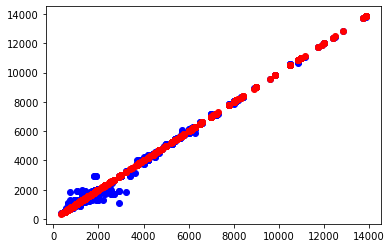

In [28]:
plt.scatter(y_train,y_pred,color='blue',label='Prediction')
plt.scatter(y_train,y_train,color='red',label='Perfect prediction')

In [29]:
metrics.mean_absolute_error(y_train,y_pred)

96.20224886956736

In [30]:
predictions = model.predict(X_test)

In [31]:
metrics.r2_score(predictions,y_test)

0.9929942070403718

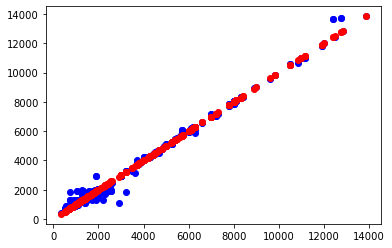

In [32]:
plt.scatter(y_test,predictions,color='blue',label='Prediction')
plt.scatter(y_test,y_test,color='red',label='Perfect prediction')

In [33]:
metrics.mean_absolute_error(predictions,y_test)

128.18950498812805

In [34]:
X_train.columns

Index(['totalkgds', 'vehicle_body_type', 'vehicle_package_type', 'routes',
       'km', 'kursunsuz_v_max', 'km_fuel'],
      dtype='object')

In [35]:
model.feature_importances_

array([0.0040991 , 0.00133608, 0.00097278, 0.00377169, 0.38792756,
       0.00106565, 0.60082716], dtype=float32)

In [36]:
mart_data = pd.read_excel('desktop/ilk_otuz_shipment.xlsx', sheet_name= 'mart')
mart_data

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km
0,1XXOV78P,TRY,DELIVERED,NaN,NaN,2022-03-01 07:51:10.984,2022-03-01 06:55:51.141,NaN,621dc372151ce457bd2bf238,21600.00,...,280.37,15.5836,13.9104,1.120284,4200.0,301.93,269.51,1.0,Ä°stanbul_Bilecik,NaN
1,M5PUGNMQ,TRY,DELIVERED,NaN,NaN,2022-03-01 18:04:15.450,2022-02-28 15:07:09.999,NaN,621ce51d66f1f50b18a4c191,15000.00,...,79.40,15.5836,13.9104,1.120284,1350.0,97.05,86.63,1.0,Ä°stanbul_Ä°stanbul,1.0
2,0E8F7OJA,TRY,DELIVERED,NaN,NaN,2022-03-01 06:19:46.626,2022-02-28 15:08:22.575,NaN,621ce56566f1f50b18a4c192,15000.00,...,86.62,15.5836,13.9104,1.120284,1350.0,97.05,86.63,1.0,Ä°stanbul_Ä°stanbul,1.0
3,P0T67FW2,EUR,DELIVERED,NaN,NaN,2022-03-02 11:00:05.177,2022-02-28 12:02:53.157,NaN,621cb9e6d9ebe0754f2864a4,510.00,...,57.75,15.5836,13.9104,1.120284,1000.0,71.89,64.17,2.0,Ä°stanbul_Ä°zmir,479.0
4,72O60VFO,TRY,DELIVERED,NaN,NaN,2022-03-01 18:05:48.553,2022-02-28 14:25:43.604,NaN,621cdb6666f1f50b18a4c18f,15000.00,...,86.62,15.5836,13.9104,1.120284,1400.0,100.64,89.84,1.0,Ä°stanbul_Ä°stanbul,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,W14I0EBN,TRY,APPROVED,NaN,NaN,2022-03-18 07:13:48.654,2022-03-18 07:10:28.330,NaN,6234305e6ce2ef1d6e441d21,30000.00,...,NaN,NaN,NaN,NaN,5800.0,NaN,NaN,1.0,Antalya_Ä°zmir,NaN
2366,XVOTUZ76,TRY,IN_PICKUP,BrandasÄ± saÄŸlam olmalÄ±.,NaN,2022-03-18 07:20:08.860,2022-03-18 06:32:13.560,Y22-3328,6234276a4626e8222baef3ae,15000.00,...,292.59,NaN,NaN,NaN,4381.0,NaN,NaN,1.0,Kocaeli_Manisa,NaN
2367,DCPBBKP1,TRY,APPROVED,NaN,NaN,2022-03-18 06:40:12.564,2022-03-18 06:27:26.680,NaN,623426446a3ffb1cc5085fee,11000.00,...,NaN,NaN,NaN,NaN,3750.0,NaN,NaN,1.0,Ä°stanbul_Bursa,NaN
2368,TC0KXIOZ,TRY,CANCELED,NaN,NaN,2022-02-17 13:55:37.242,2022-02-14 09:19:45.624,NaN,620a1e7a9fa329591220165a,5907.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ä°stanbul_Antalya,NaN


In [37]:
mart_data['Tarih']= mart_data.pickup_start_date.str[:-13]
mart_data['Tarih']

0       2022-03-01
1       2022-03-01
2       2022-03-01
3       2022-03-01
4       2022-03-01
           ...    
2365    2022-03-19
2366    2022-03-21
2367    2022-03-21
2368    2022-04-01
2369    2022-04-08
Name: Tarih, Length: 2370, dtype: object

In [38]:
mart_inner_join = pd.merge(mart_data, 
                      data, 
                      on ='Tarih', 
                      how ='inner')
mart_inner_join

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
0,1XXOV78P,TRY,DELIVERED,NaN,NaN,2022-03-01 07:51:10.984,2022-03-01 06:55:51.141,NaN,621dc372151ce457bd2bf238,21600.0,...,1.120284,4200.0,301.93,269.51,1.0,Ä°stanbul_Bilecik,NaN,2022-03-01,16.53 TL,16.05 TL
1,1XXOV78P,TRY,DELIVERED,NaN,NaN,2022-03-01 07:51:10.984,2022-03-01 06:55:51.141,NaN,621dc372151ce457bd2bf238,21600.0,...,1.120284,4200.0,301.93,269.51,1.0,Ä°stanbul_Bilecik,NaN,2022-03-01,16.53 TL,16.05 TL
2,M5PUGNMQ,TRY,DELIVERED,NaN,NaN,2022-03-01 18:04:15.450,2022-02-28 15:07:09.999,NaN,621ce51d66f1f50b18a4c191,15000.0,...,1.120284,1350.0,97.05,86.63,1.0,Ä°stanbul_Ä°stanbul,1.0,2022-03-01,16.53 TL,16.05 TL
3,M5PUGNMQ,TRY,DELIVERED,NaN,NaN,2022-03-01 18:04:15.450,2022-02-28 15:07:09.999,NaN,621ce51d66f1f50b18a4c191,15000.0,...,1.120284,1350.0,97.05,86.63,1.0,Ä°stanbul_Ä°stanbul,1.0,2022-03-01,16.53 TL,16.05 TL
4,0E8F7OJA,TRY,DELIVERED,NaN,NaN,2022-03-01 06:19:46.626,2022-02-28 15:08:22.575,NaN,621ce56566f1f50b18a4c192,15000.0,...,1.120284,1350.0,97.05,86.63,1.0,Ä°stanbul_Ä°stanbul,1.0,2022-03-01,16.53 TL,16.05 TL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,GUWA5NC0,TRY,DELIVERED,NaN,NaN,2022-03-16 08:24:33.290,2022-03-15 14:08:18.837,40919092,NaN,186.0,...,1.099432,NaN,NaN,NaN,1.0,Kocaeli_Ä°stanbul,94.1,2022-03-15,20.38 TL,20.61 TL
2956,OG4KP8X6,TRY,DELIVERED,NaN,NaN,2022-03-16 14:48:16.970,2022-03-15 13:45:30.959,5183270345,NaN,320.0,...,1.099432,NaN,NaN,NaN,2.0,Ä°stanbul_Ankara,443.9,2022-03-15,20.38 TL,20.61 TL
2957,OG4KP8X6,TRY,DELIVERED,NaN,NaN,2022-03-16 14:48:16.970,2022-03-15 13:45:30.959,5183270345,NaN,320.0,...,1.099432,NaN,NaN,NaN,2.0,Ä°stanbul_Ankara,443.9,2022-03-15,20.38 TL,20.61 TL
2958,6QU98V2A,TRY,DELIVERED,NaN,NaN,2022-03-16 08:28:59.752,2022-03-15 14:08:18.662,40914153,NaN,207.0,...,1.099432,NaN,NaN,NaN,1.0,Kocaeli_Ä°stanbul,94.1,2022-03-15,20.38 TL,20.61 TL


In [39]:
mart_inner_join=mart_inner_join.groupby('id').max()

In [40]:
mart_inner_join['kursunsuz_v_max'] = mart_inner_join['kursunsuz_v_max'].str[:-2]
mart_inner_join['kursunsuz_v_max']

id
01KA9MCP    17.42 
02DTUCYM    16.53 
02NQTAU5    20.38 
031ZJED9    17.42 
03WIAQH4    20.38 
             ...  
ZTWDFMCA    20.35 
ZTX5RTA2    16.53 
ZUYO3G05    20.38 
ZY2K6IS4    17.98 
ZYK4WYU8    16.53 
Name: kursunsuz_v_max, Length: 1480, dtype: object

In [41]:
mart_inner_join['pro_dizel'] = mart_inner_join['pro_dizel'].str[:-2]
mart_inner_join['pro_dizel']

id
01KA9MCP    17.56 
02DTUCYM    16.05 
02NQTAU5    22.86 
031ZJED9    17.56 
03WIAQH4    22.86 
             ...  
ZTWDFMCA    22.81 
ZTX5RTA2    16.05 
ZUYO3G05    22.86 
ZY2K6IS4    18.92 
ZYK4WYU8    16.06 
Name: pro_dizel, Length: 1480, dtype: object

In [42]:
mart_inner_join['pro_dizel'] = mart_inner_join.pro_dizel.astype(float)
mart_inner_join.kursunsuz_v_max = mart_inner_join.kursunsuz_v_max.astype(float)
mart_inner_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, 01KA9MCP to ZYK4WYU8
Data columns (total 88 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   value_currency                              1480 non-null   object 
 1   latest_status                               1480 non-null   object 
 2   shipper_note                                194 non-null    object 
 3   updatedby                                   214 non-null    object 
 4   updatedat                                   1480 non-null   object 
 5   createdat                                   1480 non-null   object 
 6   order_id                                    761 non-null    object 
 7   pricing_id                                  779 non-null    object 
 8   totalkgds                                   1480 non-null   float64
 9   pickup_start_date                           1480 non-null   object 
 10  pickup

In [43]:
mart_data = mart_inner_join
mart_data

,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,pickup_start_date,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
01KA9MCP,TRY,DELIVERED,NaN,NaN,2022-03-05 12:15:58.147,2022-03-02 13:55:28.290,NaN,621f774fe8037570c4cc4888,8000.00,2022-03-03 05:00:00.000,...,1.109136,7750.00,548.19,494.25,1.0,Kocaeli_Mersin,NaN,2022-03-03,17.42,17.56
02DTUCYM,TRY,DELIVERED,NaN,61485fe9ef31ce19fc2cc0da,2022-03-09 10:51:39.465,2022-03-01 14:25:27.347,40873083,NaN,1.80,2022-03-01 11:00:00.000,...,1.120284,112.98,8.12,7.25,2.0,Kocaeli_Bursa,NaN,2022-03-01,16.53,16.05
02NQTAU5,TRY,DELIVERED,NaN,NaN,2022-03-15 06:15:01.540,2022-03-10 11:38:40.446,NaN,NaN,576.00,2022-03-11 06:00:00.000,...,1.104502,409.00,27.69,25.07,2.0,Kocaeli_Ankara,NaN,2022-03-11,20.38,22.86
031ZJED9,TRY,CANCELED,Onay alÄ±narak ilerlenecek,NaN,2022-03-04 06:51:33.313,2022-03-03 06:41:16.737,NaN,6220630382bdd701ade7f39b,19000.00,2022-03-03 06:00:00.000,...,1.109136,4200.00,297.08,267.85,NaN,Ankara_Sakarya,NaN,2022-03-03,17.42,17.56
03WIAQH4,TRY,CANCELED,NaN,NaN,2022-03-07 10:07:08.634,2022-03-07 10:06:01.191,NaN,6225d907ed4bd061b222275b,24000.00,2022-03-12 06:00:00.000,...,1.104502,NaN,NaN,NaN,NaN,Mersin_Styria,NaN,2022-03-12,20.38,22.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTWDFMCA,TRY,IN_TRANSIT,NaN,NaN,2022-03-11 07:54:18.213,2022-03-10 08:37:32.940,NaN,6229b8c9f75a5700ad5111f7,5000.00,2022-03-10 06:00:00.000,...,1.104502,5414.00,366.55,331.87,1.0,Kocaeli_Antalya,NaN,2022-03-10,20.35,22.81
ZTX5RTA2,TRY,DELIVERED,NaN,61485fe9ef31ce19fc2cc0da,2022-03-09 10:51:39.465,2022-03-01 14:25:27.628,40876608,NaN,33.48,2022-03-01 11:00:00.000,...,1.120284,112.98,8.12,7.25,1.0,Kocaeli_Ä°stanbul,94.1,2022-03-01,16.53,16.05
ZUYO3G05,TRY,CANCELED,NaN,NaN,2022-03-07 10:07:08.634,2022-03-07 10:06:01.191,NaN,6225d907ed4bd061b222275b,24000.00,2022-03-12 06:00:00.000,...,1.104502,NaN,NaN,NaN,NaN,Mersin_Styria,NaN,2022-03-12,20.38,22.86


In [44]:
mart_data = mart_data[mart_data.total_cost_amount_in_tl > 10]
mart_data = mart_data[mart_data.total_cost_amount_in_tl < 13850]

mart_data

,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,pickup_start_date,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
01KA9MCP,TRY,DELIVERED,NaN,NaN,2022-03-05 12:15:58.147,2022-03-02 13:55:28.290,NaN,621f774fe8037570c4cc4888,8000.0,2022-03-03 05:00:00.000,...,1.109136,7750.00,548.19,494.25,1.0,Kocaeli_Mersin,NaN,2022-03-03,17.42,17.56
02NQTAU5,TRY,DELIVERED,NaN,NaN,2022-03-15 06:15:01.540,2022-03-10 11:38:40.446,NaN,NaN,576.0,2022-03-11 06:00:00.000,...,1.104502,409.00,27.69,25.07,2.0,Kocaeli_Ankara,NaN,2022-03-11,20.38,22.86
06KGX4F3,TRY,DELIVERED,NaN,NaN,2022-03-17 08:31:55.560,2022-03-14 12:47:10.978,NaN,622f394286d9120ac94a5ac3,25000.0,2022-03-15 06:00:00.000,...,1.099432,7142.31,483.34,439.63,1.0,Burdur_Bolu,566.4,2022-03-15,20.38,20.61
06OXNBN0,TRY,DELIVERED,NaN,NaN,2022-03-04 19:55:33.340,2022-03-04 07:19:02.666,NaN,6221bd6309204a5ed8a4a43a,25000.0,2022-03-04 06:00:00.000,...,1.109136,2550.00,180.37,162.62,1.0,Bursa_Kocaeli,132.4,2022-03-04,17.98,18.92
06P191MS,TRY,DELIVERED,NaN,NaN,2022-03-08 14:36:10.718,2022-03-08 14:31:19.463,NaN,NaN,576.0,2022-03-09 06:00:00.000,...,1.094878,389.00,26.58,24.28,2.0,Kocaeli_Manisa,NaN,2022-03-09,20.35,22.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZQAVOC2C,TRY,DELIVERED,ADANA UÄžRAMA,NaN,2022-03-01 07:44:54.157,2022-03-01 06:57:57.343,NaN,621dc3efa982ab546511fb6b,10000.0,2022-03-01 06:00:00.000,...,1.120284,8050.00,578.70,516.57,1.0,Kocaeli_Gaziantep,NaN,2022-03-01,16.53,16.05
ZRQPTNI7,TRY,DELIVERED,--,NaN,2022-03-15 19:18:13.826,2022-03-15 15:03:22.206,-,6230aaae313dee7ca5ecde8e,10000.0,2022-03-15 11:00:00.000,...,1.099432,4800.00,324.83,295.45,1.0,Ä°stanbul_Ä°zmir,479.0,2022-03-15,20.38,20.61
ZSIQN046,TRY,DELIVERED,NaN,NaN,2022-03-18 06:12:08.242,2022-03-15 12:33:43.560,5100245259,NaN,2323.2,2022-03-15 06:00:00.000,...,1.099432,1486.85,100.62,91.52,3.0,Ä°stanbul_Bursa,NaN,2022-03-15,20.38,20.61


In [45]:
# Get Delivered Shipments
accepted = (['DELIVERED'])

mart_data = mart_data[mart_data.latest_status.isin(accepted)]
mart_data

,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,pickup_start_date,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
01KA9MCP,TRY,DELIVERED,NaN,NaN,2022-03-05 12:15:58.147,2022-03-02 13:55:28.290,NaN,621f774fe8037570c4cc4888,8000.0,2022-03-03 05:00:00.000,...,1.109136,7750.00,548.19,494.25,1.0,Kocaeli_Mersin,NaN,2022-03-03,17.42,17.56
02NQTAU5,TRY,DELIVERED,NaN,NaN,2022-03-15 06:15:01.540,2022-03-10 11:38:40.446,NaN,NaN,576.0,2022-03-11 06:00:00.000,...,1.104502,409.00,27.69,25.07,2.0,Kocaeli_Ankara,NaN,2022-03-11,20.38,22.86
06KGX4F3,TRY,DELIVERED,NaN,NaN,2022-03-17 08:31:55.560,2022-03-14 12:47:10.978,NaN,622f394286d9120ac94a5ac3,25000.0,2022-03-15 06:00:00.000,...,1.099432,7142.31,483.34,439.63,1.0,Burdur_Bolu,566.4,2022-03-15,20.38,20.61
06OXNBN0,TRY,DELIVERED,NaN,NaN,2022-03-04 19:55:33.340,2022-03-04 07:19:02.666,NaN,6221bd6309204a5ed8a4a43a,25000.0,2022-03-04 06:00:00.000,...,1.109136,2550.00,180.37,162.62,1.0,Bursa_Kocaeli,132.4,2022-03-04,17.98,18.92
06P191MS,TRY,DELIVERED,NaN,NaN,2022-03-08 14:36:10.718,2022-03-08 14:31:19.463,NaN,NaN,576.0,2022-03-09 06:00:00.000,...,1.094878,389.00,26.58,24.28,2.0,Kocaeli_Manisa,NaN,2022-03-09,20.35,22.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZQAVOC2C,TRY,DELIVERED,ADANA UÄžRAMA,NaN,2022-03-01 07:44:54.157,2022-03-01 06:57:57.343,NaN,621dc3efa982ab546511fb6b,10000.0,2022-03-01 06:00:00.000,...,1.120284,8050.00,578.70,516.57,1.0,Kocaeli_Gaziantep,NaN,2022-03-01,16.53,16.05
ZRQPTNI7,TRY,DELIVERED,--,NaN,2022-03-15 19:18:13.826,2022-03-15 15:03:22.206,-,6230aaae313dee7ca5ecde8e,10000.0,2022-03-15 11:00:00.000,...,1.099432,4800.00,324.83,295.45,1.0,Ä°stanbul_Ä°zmir,479.0,2022-03-15,20.38,20.61
ZSIQN046,TRY,DELIVERED,NaN,NaN,2022-03-18 06:12:08.242,2022-03-15 12:33:43.560,5100245259,NaN,2323.2,2022-03-15 06:00:00.000,...,1.099432,1486.85,100.62,91.52,3.0,Ä°stanbul_Bursa,NaN,2022-03-15,20.38,20.61


In [46]:
mart_data = mart_data[mart_data.routes.isin(routes)]
mart_data

,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,pickup_start_date,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
06KGX4F3,TRY,DELIVERED,NaN,NaN,2022-03-17 08:31:55.560,2022-03-14 12:47:10.978,NaN,622f394286d9120ac94a5ac3,25000.0,2022-03-15 06:00:00.000,...,1.099432,7142.31,483.34,439.63,1.0,Burdur_Bolu,566.4,2022-03-15,20.38,20.61
06OXNBN0,TRY,DELIVERED,NaN,NaN,2022-03-04 19:55:33.340,2022-03-04 07:19:02.666,NaN,6221bd6309204a5ed8a4a43a,25000.0,2022-03-04 06:00:00.000,...,1.109136,2550.00,180.37,162.62,1.0,Bursa_Kocaeli,132.4,2022-03-04,17.98,18.92
08WH8WLP,TRY,DELIVERED,NaN,NaN,2022-03-05 21:16:07.408,2022-03-05 06:27:48.366,NaN,622302d8d6e9721bd113bfc6,25000.0,2022-03-05 06:00:00.000,...,1.109136,2550.00,180.37,162.62,1.0,Bursa_Kocaeli,132.4,2022-03-05,18.69,19.77
08XFCSA4,TRY,DELIVERED,NaN,NaN,2022-03-12 05:32:31.456,2022-03-11 06:34:30.399,NaN,622aed6e8d60f94ffb9b33be,25000.0,2022-03-11 11:00:00.000,...,1.104502,2726.00,184.56,167.10,1.0,Bursa_Kocaeli,132.4,2022-03-11,20.38,22.86
0A2OCHU5,TRY,DELIVERED,NaN,NaN,2022-03-15 15:00:30.193,2022-03-15 11:21:58.719,NaN,623076d3038bae395aa3e615,25000.0,2022-03-15 06:00:00.000,...,1.099432,2622.00,177.44,161.39,1.0,Bursa_Kocaeli,132.4,2022-03-15,20.38,20.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YU4MQN3J,TRY,DELIVERED,NaN,NaN,2022-03-03 05:35:33.911,2022-03-02 08:53:33.800,NaN,621f30885000502a3604ff2e,25000.0,2022-03-02 06:00:00.000,...,1.109294,2300.00,163.54,147.43,1.0,Bursa_Kocaeli,132.4,2022-03-02,16.53,16.06
Z0SSM0Q5,TRY,DELIVERED,NaN,NaN,2022-03-03 17:10:06.839,2022-03-03 06:49:33.177,NaN,622064f97870cc3718e48223,25000.0,2022-03-03 06:00:00.000,...,1.109136,2300.00,162.69,146.68,1.0,Bursa_Kocaeli,132.4,2022-03-03,17.42,17.56
Z1CV5784,TRY,DELIVERED,NaN,NaN,2022-03-14 19:51:03.156,2022-03-14 19:30:13.916,NaN,622f97c00d213439f3550823,16000.0,2022-03-04 09:00:00.000,...,1.109136,2226.00,157.45,141.96,1.0,Bursa_Bursa,1.0,2022-03-04,17.98,18.92


In [47]:
#Split Data by Shipment Type
mart_data = mart_data[mart_data.shipment_type == 'FTL']
orj_mart_data = mart_data
mart_data

,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,pickup_start_date,...,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes,km,Tarih,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
06KGX4F3,TRY,DELIVERED,NaN,NaN,2022-03-17 08:31:55.560,2022-03-14 12:47:10.978,NaN,622f394286d9120ac94a5ac3,25000.0,2022-03-15 06:00:00.000,...,1.099432,7142.31,483.34,439.63,1.0,Burdur_Bolu,566.4,2022-03-15,20.38,20.61
06OXNBN0,TRY,DELIVERED,NaN,NaN,2022-03-04 19:55:33.340,2022-03-04 07:19:02.666,NaN,6221bd6309204a5ed8a4a43a,25000.0,2022-03-04 06:00:00.000,...,1.109136,2550.00,180.37,162.62,1.0,Bursa_Kocaeli,132.4,2022-03-04,17.98,18.92
08WH8WLP,TRY,DELIVERED,NaN,NaN,2022-03-05 21:16:07.408,2022-03-05 06:27:48.366,NaN,622302d8d6e9721bd113bfc6,25000.0,2022-03-05 06:00:00.000,...,1.109136,2550.00,180.37,162.62,1.0,Bursa_Kocaeli,132.4,2022-03-05,18.69,19.77
08XFCSA4,TRY,DELIVERED,NaN,NaN,2022-03-12 05:32:31.456,2022-03-11 06:34:30.399,NaN,622aed6e8d60f94ffb9b33be,25000.0,2022-03-11 11:00:00.000,...,1.104502,2726.00,184.56,167.10,1.0,Bursa_Kocaeli,132.4,2022-03-11,20.38,22.86
0A2OCHU5,TRY,DELIVERED,NaN,NaN,2022-03-15 15:00:30.193,2022-03-15 11:21:58.719,NaN,623076d3038bae395aa3e615,25000.0,2022-03-15 06:00:00.000,...,1.099432,2622.00,177.44,161.39,1.0,Bursa_Kocaeli,132.4,2022-03-15,20.38,20.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YU4MQN3J,TRY,DELIVERED,NaN,NaN,2022-03-03 05:35:33.911,2022-03-02 08:53:33.800,NaN,621f30885000502a3604ff2e,25000.0,2022-03-02 06:00:00.000,...,1.109294,2300.00,163.54,147.43,1.0,Bursa_Kocaeli,132.4,2022-03-02,16.53,16.06
Z0SSM0Q5,TRY,DELIVERED,NaN,NaN,2022-03-03 17:10:06.839,2022-03-03 06:49:33.177,NaN,622064f97870cc3718e48223,25000.0,2022-03-03 06:00:00.000,...,1.109136,2300.00,162.69,146.68,1.0,Bursa_Kocaeli,132.4,2022-03-03,17.42,17.56
Z1CV5784,TRY,DELIVERED,NaN,NaN,2022-03-14 19:51:03.156,2022-03-14 19:30:13.916,NaN,622f97c00d213439f3550823,16000.0,2022-03-04 09:00:00.000,...,1.109136,2226.00,157.45,141.96,1.0,Bursa_Bursa,1.0,2022-03-04,17.98,18.92


In [48]:
mart_data = pd.concat([mart_data['latest_status'],mart_data['totalkgds'],mart_data['pickup_city'],mart_data['dropoff_city'] ,mart_data['pickup_address_type'], mart_data['dropoff_address_type'],
                  mart_data['category'], mart_data['price_type'], 
                  mart_data['shipment_type'], mart_data['vehicle_type'],mart_data['vehicle_body_type'],
                  mart_data['vehicle_package_type'], mart_data['vehicle_way_of_loading'],
                  mart_data['vehicle_tonnage_per_vehicle'],mart_data['payment_option'],
                  mart_data['invoice_type'], mart_data['tenant_signup_flow'], 
                  mart_data['total_cost_amount_in_tl'], mart_data['usd_tl'],
                  mart_data['price_base_amount_in_tl']
                 ,mart_data['routes'],mart_data['km'],mart_data['kursunsuz_v_max'],mart_data['pro_dizel']], axis = 1)
mart_data

,latest_status,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,price_type,shipment_type,vehicle_type,...,payment_option,invoice_type,tenant_signup_flow,total_cost_amount_in_tl,usd_tl,price_base_amount_in_tl,routes,km,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,,,,,
06KGX4F3,DELIVERED,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,7000.0,14.7769,7142.31,Burdur_Bolu,566.4,20.38,20.61
06OXNBN0,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,2350.0,14.1374,2550.00,Bursa_Kocaeli,132.4,17.98,18.92
08WH8WLP,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,2400.0,14.1374,2550.00,Bursa_Kocaeli,132.4,18.69,19.77
08XFCSA4,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,2600.0,14.7700,2726.00,Bursa_Kocaeli,132.4,20.38,22.86
0A2OCHU5,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,2500.0,14.7769,2622.00,Bursa_Kocaeli,132.4,20.38,20.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YU4MQN3J,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,2200.0,14.0639,2300.00,Bursa_Kocaeli,132.4,16.53,16.06
Z0SSM0Q5,DELIVERED,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,NaN,SELF_SIGNUP,2250.0,14.1374,2300.00,Bursa_Kocaeli,132.4,17.42,17.56
Z1CV5784,DELIVERED,16000.0,Bursa,Bursa,FACTORY,SEAPORT,DRY_FOOD,NaN,FTL,SEMI_TRUCK,...,PAY_LATER,E_INVOICE,SELF_SIGNUP,2200.0,14.1374,2226.00,Bursa_Bursa,1.0,17.98,18.92


In [49]:
mart_data = mart_data.drop(columns = 'shipment_type')
mart_data = mart_data.drop(columns = 'latest_status')
mart_data = mart_data.drop(columns = 'price_base_amount_in_tl')
mart_data = mart_data.drop(columns = 'price_type')
mart_data = mart_data.drop(columns = 'payment_option')
mart_data = mart_data.drop(columns = 'invoice_type')
mart_data = mart_data.drop(columns = 'tenant_signup_flow')

In [50]:
mart_data['km_fuel'] = mart_data.km*mart_data.kursunsuz_v_max

In [51]:
new_data = mart_data.drop(columns = drops)
new_data.columns

Index(['totalkgds', 'vehicle_body_type', 'vehicle_package_type',
       'total_cost_amount_in_tl', 'routes', 'km', 'kursunsuz_v_max',
       'km_fuel'],
      dtype='object')

In [52]:
mart_data[mart_data['total_cost_amount_in_tl']<1000]

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel,km_fuel
id,,,,,,,,,,,,,,,,,,
49XEH85I,12660.0,Kocaeli,Kocaeli,WAREHOUSE,MALL,DRY_FOOD,_10_WHEELER,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,12.660,900.0,14.1374,Kocaeli_Kocaeli,1.0,17.98,18.92,17.98
E56N2774,10143.0,Kocaeli,Kocaeli,WAREHOUSE,MALL,OTHER,_10_WHEELER,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,10.143,900.0,14.7700,Kocaeli_Kocaeli,1.0,20.35,22.81,20.35
I3S5B53S,10000.0,Kocaeli,Kocaeli,WAREHOUSE,WAREHOUSE,CHEMICAL,_10_WHEELER,TAUTLINER,NaN,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,10.000,800.0,13.9104,Kocaeli_Kocaeli,1.0,16.53,16.05,16.53


In [53]:
mart_data[mart_data['total_cost_amount_in_tl']==3000]

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel,km_fuel
id,,,,,,,,,,,,,,,,,,
0TI75KYN,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,3000.0,14.77,Bursa_Kocaeli,132.4,20.38,22.86,2698.312
CXGE5RPT,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,3000.0,14.77,Bursa_Kocaeli,132.4,20.38,22.86,2698.312
JH39JADT,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,3000.0,14.77,Bursa_Kocaeli,132.4,20.38,22.86,2698.312
QR0OB2MN,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,3000.0,14.77,Bursa_Kocaeli,132.4,20.38,22.86,2698.312


In [54]:
mart_data[mart_data['total_cost_amount_in_tl']==3900]

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel,km_fuel
id,,,,,,,,,,,,,,,,,,
0UGJJH6O,20000.0,Bursa,Kocaeli,OTHER,OTHER,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,20.0,3900.0,14.4989,Bursa_Kocaeli,132.4,19.27,21.22,2551.348


In [55]:
mart_data[mart_data['total_cost_amount_in_tl']==6000]

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel,km_fuel
id,,,,,,,,,,,,,,,,,,
4S8TRJMD,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,6000.0,13.9104,Burdur_Bolu,566.4,16.53,16.05,9362.592
DHJ2QI9D,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,6000.0,13.9104,Burdur_Bolu,566.4,16.53,16.05,9362.592
EE046O9Q,25000.0,Bursa,Kayseri,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,6000.0,13.9104,Bursa_Kayseri,665.9,16.53,16.05,11007.327
GBB0D6UF,25000.0,Bursa,Kayseri,FACTORY,WAREHOUSE,BUILD,OTHER,OTHER,SACK,BY_CRANE,25.0,6000.0,14.0639,Bursa_Kayseri,665.9,16.53,16.06,11007.327
GKRIXO08,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,6000.0,13.9104,Burdur_Bolu,566.4,16.53,16.05,9362.592
PHWU9XJK,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,SEMI_TRUCK,FLATBED,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,6000.0,14.0639,Burdur_Bolu,566.4,16.53,16.06,9362.592
T2DBH9LP,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,SEMI_TRUCK,FLATBED,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,6000.0,14.0639,Burdur_Bolu,566.4,16.53,16.06,9362.592


In [56]:
mart_data[mart_data['total_cost_amount_in_tl']==6500]

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel,km_fuel
id,,,,,,,,,,,,,,,,,,
1P5VGU9E,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,6500.0,14.4989,Burdur_Bolu,566.4,19.27,21.22,10914.528
IGQK5ZD1,25000.0,Bursa,Kayseri,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,6500.0,14.7769,Bursa_Kayseri,665.9,20.38,20.61,13571.042
LDFZWQJ3,25000.0,Bursa,Kayseri,FACTORY,WAREHOUSE,BUILD,OTHER,OTHER,OTHER,BY_CRANE,25.0,6500.0,14.1374,Bursa_Kayseri,665.9,18.69,19.77,12445.671
PYY7RVST,25000.0,Bursa,Kayseri,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,6500.0,14.1374,Bursa_Kayseri,665.9,18.69,19.77,12445.671


In [57]:
mart_data[mart_data['total_cost_amount_in_tl']>15000]

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel,km_fuel
id,,,,,,,,,,,,,,,,,,


In [58]:
mart_data[mart_data['total_cost_amount_in_tl'] ==6500]

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel,km_fuel
id,,,,,,,,,,,,,,,,,,
1P5VGU9E,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,6500.0,14.4989,Burdur_Bolu,566.4,19.27,21.22,10914.528
IGQK5ZD1,25000.0,Bursa,Kayseri,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,6500.0,14.7769,Bursa_Kayseri,665.9,20.38,20.61,13571.042
LDFZWQJ3,25000.0,Bursa,Kayseri,FACTORY,WAREHOUSE,BUILD,OTHER,OTHER,OTHER,BY_CRANE,25.0,6500.0,14.1374,Bursa_Kayseri,665.9,18.69,19.77,12445.671
PYY7RVST,25000.0,Bursa,Kayseri,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,6500.0,14.1374,Bursa_Kayseri,665.9,18.69,19.77,12445.671


In [59]:
mart_data[mart_data['total_cost_amount_in_tl'] ==6800]

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel,km_fuel
id,,,,,,,,,,,,,,,,,,
CWZOG53X,25000.0,Bursa,Kayseri,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,6800.0,14.77,Bursa_Kayseri,665.9,20.35,22.81,13551.065


In [60]:
labelencoder = LabelEncoder()
mart_data['category'] = labelencoder.fit_transform(mart_data['category'])
mart_data['vehicle_type'] = labelencoder.fit_transform(mart_data['vehicle_type'])
mart_data['vehicle_body_type'] = labelencoder.fit_transform(mart_data['vehicle_body_type'])
mart_data['vehicle_package_type'] = labelencoder.fit_transform(mart_data['vehicle_package_type'])
mart_data['vehicle_way_of_loading'] = labelencoder.fit_transform(mart_data['vehicle_way_of_loading'])
mart_data['pickup_address_type'] = labelencoder.fit_transform(mart_data['pickup_address_type'])
mart_data['dropoff_address_type'] = labelencoder.fit_transform(mart_data['dropoff_address_type'])
mart_data['routes'] = labelencoder.fit_transform(mart_data['routes'])
mart_data['pickup_city'] = labelencoder.fit_transform(mart_data['pickup_city'])
mart_data['dropoff_city'] = labelencoder.fit_transform(mart_data['dropoff_city'])


mart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 06KGX4F3 to ZY2K6IS4
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    217 non-null    float64
 1   pickup_city                  217 non-null    int64  
 2   dropoff_city                 217 non-null    int64  
 3   pickup_address_type          217 non-null    int64  
 4   dropoff_address_type         217 non-null    int64  
 5   category                     217 non-null    int64  
 6   vehicle_type                 217 non-null    int64  
 7   vehicle_body_type            217 non-null    int64  
 8   vehicle_package_type         217 non-null    int64  
 9   vehicle_way_of_loading       217 non-null    int64  
 10  vehicle_tonnage_per_vehicle  217 non-null    float64
 11  total_cost_amount_in_tl      217 non-null    float64
 12  usd_tl                       217 non-null    float64
 13  routes       

In [61]:
mart_data = mart_data.drop(columns = drops)
mart_data.columns

Index(['totalkgds', 'vehicle_body_type', 'vehicle_package_type',
       'total_cost_amount_in_tl', 'routes', 'km', 'kursunsuz_v_max',
       'km_fuel'],
      dtype='object')

In [62]:
mart_predict= model.predict(mart_data.drop(columns = ['total_cost_amount_in_tl']))

In [63]:
metrics.r2_score(mart_data.total_cost_amount_in_tl,mart_predict)

0.9268023317385307

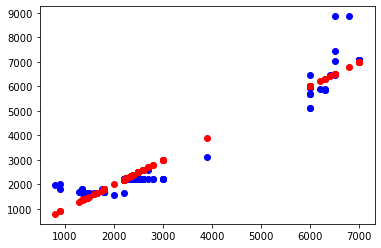

In [64]:
plt.scatter(mart_data.total_cost_amount_in_tl,mart_predict,color='blue',label='Prediction')
plt.scatter(mart_data.total_cost_amount_in_tl,mart_data.total_cost_amount_in_tl,color='red',label='Perfect prediction')

In [65]:
metrics.mean_absolute_error(mart_data.total_cost_amount_in_tl, mart_predict)

260.75383874567973

In [66]:
mart_predict = pd.DataFrame(mart_predict)
mart_data.total_cost_amount_in_tl,mart_predict

(id
 06KGX4F3    7000.0
 06OXNBN0    2350.0
 08WH8WLP    2400.0
 08XFCSA4    2600.0
 0A2OCHU5    2500.0
              ...  
 YU4MQN3J    2200.0
 Z0SSM0Q5    2250.0
 Z1CV5784    2200.0
 Z6M54G3W    1450.0
 ZY2K6IS4    6300.0
 Name: total_cost_amount_in_tl, Length: 217, dtype: float64,
                0
 0    7082.781250
 1    2216.505859
 2    2216.505859
 3    2216.505859
 4    2216.505859
 ..           ...
 212  2216.505859
 213  2216.505859
 214  1633.270630
 215  1639.914429
 216  5881.375000
 
 [217 rows x 1 columns])

In [67]:
differances = []
predict_mart = []
for i in range(217):
    differances.append(mart_predict.iloc[i:i+1]- mart_data.total_cost_amount_in_tl.iloc[i])
    predict_mart.append(mart_predict.iloc[i:i+1])
    i += 1
differances

[          0
 0  82.78125,
             0
 1 -133.494141,
             0
 2 -183.494141,
             0
 3 -383.494141,
             0
 4 -283.494141,
            0
 5  16.505859,
            0
 6  16.505859,
             0
 7 -783.494141,
             0
 8 -183.494141,
             0
 9 -760.566162,
              0
 10 -283.494141,
              0
 11 -383.494141,
             0
 12  16.505859,
             0
 13 -55.371094,
            0
 14  82.78125,
              0
 15 -283.494141,
              0
 16 -383.494141,
             0
 17 -431.28125,
              0
 18 -283.494141,
             0
 19  48.046753,
              0
 20  458.131348,
              0
 21 -583.494141,
              0
 22  189.914429,
              0
 23 -283.494141,
              0
 24 -383.494141,
              0
 25 -383.494141,
              0
 26 -383.494141,
             0
 27 -33.494141,
             0
 28 -33.494141,
             0
 29 -10.085571,
              0
 30 -283.494141,
              0
 31  92

In [68]:
#differances = pd.DataFrame([differances])
#differances = pd.DataFrame.transpose(differances)

In [69]:
in_one_mse= []
for i in range(217):
    in_one_mse.append(differances[i]**2 < metrics.mean_squared_error(mart_data.total_cost_amount_in_tl, mart_predict))
    i = i+ 1

In [70]:
between_one_three_mse = []
for i in range(217):
    between_one_three_mse.append((differances[i]**2 > (metrics.mean_squared_error(mart_data.total_cost_amount_in_tl, mart_predict))) & (differances[i]**2 < 3*metrics.mean_squared_error(mart_data.total_cost_amount_in_tl,mart_predict)))
    i = i+ 1

In [71]:
more_than_three_mse = []
for i in range(217):
    more_than_three_mse.append(differances[i]**2 > 3*(metrics.mean_squared_error(mart_data.total_cost_amount_in_tl, mart_predict)))
    i = i+ 1

In [72]:
final = pd.DataFrame()
final['total_cost'] = mart_data.total_cost_amount_in_tl
final['mart_predict'] = predict_mart
final['differances'] = differances
final['in_one_mse'] = in_one_mse
final['between_one_three_mse'] = between_one_three_mse
final['more_than_three_mse'] = more_than_three_mse
final

,total_cost,mart_predict,differances,in_one_mse,between_one_three_mse,more_than_three_mse
id,,,,,,
06KGX4F3,7000.0,0 0 7082.78125,0 0 82.78125,0 0 True,0 0 False,0 0 False
06OXNBN0,2350.0,0 1 2216.505859,0 1 -133.494141,0 1 True,0 1 False,0 1 False
08WH8WLP,2400.0,0 2 2216.505859,0 2 -183.494141,0 2 True,0 2 False,0 2 False
08XFCSA4,2600.0,0 3 2216.505859,0 3 -383.494141,0 3 True,0 3 False,0 3 False
0A2OCHU5,2500.0,0 4 2216.505859,0 4 -283.494141,0 4 True,0 4 False,0 4 False
...,...,...,...,...,...,...
YU4MQN3J,2200.0,0 212 2216.505859,0 212 16.505859,0 212 True,0 212 False,0 212 False
Z0SSM0Q5,2250.0,0 213 2216.505859,0 213 -33.494141,0 213 True,0 213 False,0 213 False
Z1CV5784,2200.0,0 214 1633.27063,0 214 -566.72937,0 214 False,0 214 True,0 214 False


In [73]:
final['more_than_three_mse'] = final['more_than_three_mse'].astype(str).str[-5:]
final['in_one_mse'] = final['in_one_mse'].astype(str).str[-5:]
final['between_one_three_mse'] = final['between_one_three_mse'].astype(str).str[-5:]
final

,total_cost,mart_predict,differances,in_one_mse,between_one_three_mse,more_than_three_mse
id,,,,,,
06KGX4F3,7000.0,0 0 7082.78125,0 0 82.78125,True,False,False
06OXNBN0,2350.0,0 1 2216.505859,0 1 -133.494141,True,False,False
08WH8WLP,2400.0,0 2 2216.505859,0 2 -183.494141,True,False,False
08XFCSA4,2600.0,0 3 2216.505859,0 3 -383.494141,True,False,False
0A2OCHU5,2500.0,0 4 2216.505859,0 4 -283.494141,True,False,False
...,...,...,...,...,...,...
YU4MQN3J,2200.0,0 212 2216.505859,0 212 16.505859,True,False,False
Z0SSM0Q5,2250.0,0 213 2216.505859,0 213 -33.494141,True,False,False
Z1CV5784,2200.0,0 214 1633.27063,0 214 -566.72937,False,True,False


In [74]:
final_more_than_three_mse = final[final['more_than_three_mse'] == ' True']
final_more_than_three_mse

,total_cost,mart_predict,differances,in_one_mse,between_one_three_mse,more_than_three_mse
id,,,,,,
0TI75KYN,3000.0,0 7 2216.505859,0 7 -783.494141,False,False,True
0UGJJH6O,3900.0,0 9 3139.433838,0 9 -760.566162,False,False,True
49XEH85I,900.0,0 31 1824.918335,0 31 924.918335,False,False,True
CWZOG53X,6800.0,0 77 8854.673828,0 77 2054.673828,False,False,True
CXGE5RPT,3000.0,0 78 2216.505859,0 78 -783.494141,False,False,True
E56N2774,900.0,0 87 2004.301514,0 87 1104.301514,False,False,True
I3S5B53S,800.0,0 105 1973.315063,0 105 1173.315063,False,False,True
IGQK5ZD1,6500.0,0 106 8854.673828,0 106 2354.673828,False,False,True
JH39JADT,3000.0,0 117 2216.505859,0 117 -783.494141,False,False,True


In [75]:
final_more_than_three_mse.shape

(13, 6)

In [76]:
final_between_one_three_mse = final[final['between_one_three_mse'] == ' True']
final_between_one_three_mse

,total_cost,mart_predict,differances,in_one_mse,between_one_three_mse,more_than_three_mse
id,,,,,,
253TPW49,6300.0,0 17 5868.71875,0 17 -431.28125,False,True,False
28B4ENRX,1350.0,0 20 1808.131348,0 20 458.131348,False,True,False
28MLV2P6,2800.0,0 21 2216.505859,0 21 -583.494141,False,True,False
6TP7ICG3,1350.0,0 46 1807.215088,0 46 457.215088,False,True,False
97GC45T4,1300.0,0 65 1701.658447,0 65 401.658447,False,True,False
GBB0D6UF,6000.0,0 95 6451.423828,0 95 451.423828,False,True,False
LPQBLII9,6300.0,0 126 5868.71875,0 126 -431.28125,False,True,False
LZPSLDE6,2700.0,0 128 2216.505859,0 128 -483.494141,False,True,False
PYY7RVST,6500.0,0 150 7047.200684,0 150 547.200684,False,True,False


In [77]:
final_between_one_three_mse.shape

(13, 6)

In [78]:
final_in_one_mse= final[final['in_one_mse'] == ' True']
final_in_one_mse

,total_cost,mart_predict,differances,in_one_mse,between_one_three_mse,more_than_three_mse
id,,,,,,
06KGX4F3,7000.0,0 0 7082.78125,0 0 82.78125,True,False,False
06OXNBN0,2350.0,0 1 2216.505859,0 1 -133.494141,True,False,False
08WH8WLP,2400.0,0 2 2216.505859,0 2 -183.494141,True,False,False
08XFCSA4,2600.0,0 3 2216.505859,0 3 -383.494141,True,False,False
0A2OCHU5,2500.0,0 4 2216.505859,0 4 -283.494141,True,False,False
...,...,...,...,...,...,...
YJLZC84S,2500.0,0 210 2216.505859,0 210 -283.494141,True,False,False
YR2CBPB3,2350.0,0 211 2216.505859,0 211 -133.494141,True,False,False
YU4MQN3J,2200.0,0 212 2216.505859,0 212 16.505859,True,False,False


In [79]:
final_in_one_mse.shape

(191, 6)

In [80]:
metrics.mean_squared_error(mart_data.total_cost_amount_in_tl, mart_predict)**(1/2)

385.87472692539944

In [85]:
three_mse_shipments = []
for i in final_more_than_three_mse.index:
    three_mse_shipments.append(orj_mart_data.loc[i])
three_mse_shipments = pd.DataFrame(three_mse_shipments)
three_mse_shipments = pd.concat([three_mse_shipments['latest_status'],three_mse_shipments['totalkgds'],three_mse_shipments['pickup_city'],three_mse_shipments['dropoff_city'] ,three_mse_shipments['pickup_address_type'], three_mse_shipments['dropoff_address_type'],
                  three_mse_shipments['category'], three_mse_shipments['price_type'], 
                  three_mse_shipments['shipment_type'], three_mse_shipments['vehicle_type'],three_mse_shipments['vehicle_body_type'],
                  three_mse_shipments['vehicle_package_type'], three_mse_shipments['vehicle_way_of_loading'],
                  three_mse_shipments['vehicle_tonnage_per_vehicle'],three_mse_shipments['payment_option'],
                  three_mse_shipments['invoice_type'], three_mse_shipments['tenant_signup_flow'], 
                  three_mse_shipments['total_cost_amount_in_tl'], three_mse_shipments['usd_tl'],
                  three_mse_shipments['price_base_amount_in_tl']
                 ,three_mse_shipments['routes'],three_mse_shipments['km'],three_mse_shipments['kursunsuz_v_max'],three_mse_shipments['pro_dizel']], axis = 1)
three_mse_shipments
three_mse_shipments = three_mse_shipments.drop(columns = 'shipment_type')
three_mse_shipments = three_mse_shipments.drop(columns = 'latest_status')
three_mse_shipments = three_mse_shipments.drop(columns = 'price_base_amount_in_tl')
three_mse_shipments = three_mse_shipments.drop(columns = 'price_type')
three_mse_shipments = three_mse_shipments.drop(columns = 'payment_option')
three_mse_shipments = three_mse_shipments.drop(columns = 'invoice_type')
three_mse_shipments = three_mse_shipments.drop(columns = 'tenant_signup_flow')
three_mse_shipments = three_mse_shipments.drop(columns = drops)

pd.concat([three_mse_shipments,final_more_than_three_mse.mart_predict,final_more_than_three_mse.differances],axis= 1)

,totalkgds,vehicle_body_type,vehicle_package_type,total_cost_amount_in_tl,routes,km,kursunsuz_v_max,mart_predict,differances
0TI75KYN,25000.0,FLATBED,OTHER,3000.0,Bursa_Kocaeli,132.4,20.38,0 7 2216.505859,0 7 -783.494141
0UGJJH6O,20000.0,FLATBED,OTHER,3900.0,Bursa_Kocaeli,132.4,19.27,0 9 3139.433838,0 9 -760.566162
49XEH85I,12660.0,TAUTLINER,PALLET,900.0,Kocaeli_Kocaeli,1.0,17.98,0 31 1824.918335,0 31 924.918335
CWZOG53X,25000.0,FLATBED,OTHER,6800.0,Bursa_Kayseri,665.9,20.35,0 77 8854.673828,0 77 2054.673828
CXGE5RPT,25000.0,FLATBED,OTHER,3000.0,Bursa_Kocaeli,132.4,20.38,0 78 2216.505859,0 78 -783.494141
E56N2774,10143.0,TAUTLINER,PALLET,900.0,Kocaeli_Kocaeli,1.0,20.35,0 87 2004.301514,0 87 1104.301514
I3S5B53S,10000.0,TAUTLINER,NaN,800.0,Kocaeli_Kocaeli,1.0,16.53,0 105 1973.315063,0 105 1173.315063
IGQK5ZD1,25000.0,FLATBED,OTHER,6500.0,Bursa_Kayseri,665.9,20.38,0 106 8854.673828,0 106 2354.673828
JH39JADT,25000.0,FLATBED,OTHER,3000.0,Bursa_Kocaeli,132.4,20.38,0 117 2216.505859,0 117 -783.494141
LDFZWQJ3,25000.0,OTHER,OTHER,6500.0,Bursa_Kayseri,665.9,18.69,0 125 7428.783203,0 125 928.783203


In [86]:
pd.concat([three_mse_shipments,final_more_than_three_mse.mart_predict,final_more_than_three_mse.differances],axis= 1).shape

(13, 9)

In [87]:
two_mse_shipments = []
for i in final_between_one_three_mse.index:
    two_mse_shipments.append(orj_mart_data.loc[i])
two_mse_shipments = pd.DataFrame(two_mse_shipments)
two_mse_shipments = pd.concat([two_mse_shipments['latest_status'],two_mse_shipments['totalkgds'],two_mse_shipments['pickup_city'],two_mse_shipments['dropoff_city'] ,two_mse_shipments['pickup_address_type'], two_mse_shipments['dropoff_address_type'],
                  two_mse_shipments['category'], two_mse_shipments['price_type'], 
                  two_mse_shipments['shipment_type'], two_mse_shipments['vehicle_type'],two_mse_shipments['vehicle_body_type'],
                  two_mse_shipments['vehicle_package_type'], two_mse_shipments['vehicle_way_of_loading'],
                  two_mse_shipments['vehicle_tonnage_per_vehicle'],two_mse_shipments['payment_option'],
                  two_mse_shipments['invoice_type'], two_mse_shipments['tenant_signup_flow'], 
                  two_mse_shipments['total_cost_amount_in_tl'], two_mse_shipments['usd_tl'],
                  two_mse_shipments['price_base_amount_in_tl']
                 ,two_mse_shipments['routes'],two_mse_shipments['km'],two_mse_shipments['kursunsuz_v_max'],two_mse_shipments['pro_dizel']], axis = 1)
two_mse_shipments
two_mse_shipments = two_mse_shipments.drop(columns = 'shipment_type')
two_mse_shipments = two_mse_shipments.drop(columns = 'latest_status')
two_mse_shipments = two_mse_shipments.drop(columns = 'price_base_amount_in_tl')
two_mse_shipments = two_mse_shipments.drop(columns = 'price_type')
two_mse_shipments = two_mse_shipments.drop(columns = 'payment_option')
two_mse_shipments = two_mse_shipments.drop(columns = 'invoice_type')
two_mse_shipments = two_mse_shipments.drop(columns = 'tenant_signup_flow')
two_mse_shipments = two_mse_shipments.drop(columns = drops)

pd.concat([two_mse_shipments,final_between_one_three_mse.mart_predict,final_between_one_three_mse.differances],axis= 1).sort_values(by= 'routes')


,totalkgds,vehicle_body_type,vehicle_package_type,total_cost_amount_in_tl,routes,km,kursunsuz_v_max,mart_predict,differances
253TPW49,25000.0,TAUTLINER,PALLET,6300.0,Burdur_Bolu,566.4,17.42,0 17 5868.71875,0 17 -431.28125
LPQBLII9,25000.0,TAUTLINER,PALLET,6300.0,Burdur_Bolu,566.4,17.42,0 126 5868.71875,0 126 -431.28125
ZY2K6IS4,25000.0,TAUTLINER,PALLET,6300.0,Burdur_Bolu,566.4,17.98,0 216 5881.375,0 216 -418.625
QYDTOJ6O,25000.0,FLATBED,OTHER,2000.0,Bursa_Bursa,1.0,19.27,0 156 1586.709839,0 156 -413.290161
Z1CV5784,16000.0,FLATBED,PALLET,2200.0,Bursa_Bursa,1.0,17.98,0 214 1633.27063,0 214 -566.72937
GBB0D6UF,25000.0,OTHER,SACK,6000.0,Bursa_Kayseri,665.9,16.53,0 95 6451.423828,0 95 451.423828
PYY7RVST,25000.0,FLATBED,OTHER,6500.0,Bursa_Kayseri,665.9,18.69,0 150 7047.200684,0 150 547.200684
28MLV2P6,25000.0,FLATBED,OTHER,2800.0,Bursa_Kocaeli,132.4,18.69,0 21 2216.505859,0 21 -583.494141
LZPSLDE6,25000.0,FLATBED,OTHER,2700.0,Bursa_Kocaeli,132.4,17.98,0 128 2216.505859,0 128 -483.494141
TMGTHCHM,25000.0,FLATBED,OTHER,2800.0,Bursa_Kocaeli,132.4,19.27,0 175 2216.505859,0 175 -583.494141


In [88]:
pd.concat([two_mse_shipments,final_between_one_three_mse.mart_predict,final_between_one_three_mse.differances],axis= 1).shape

(13, 9)

In [98]:
reason_data = orj_data.groupby('id').max()
reason_data = pd.DataFrame(reason_data)
reason_data = pd.concat([reason_data['latest_status'],reason_data['totalkgds'],reason_data['pickup_city'],reason_data['dropoff_city'] ,reason_data['pickup_address_type'], reason_data['dropoff_address_type'],
                  reason_data['category'], reason_data['price_type'], 
                  reason_data['shipment_type'], reason_data['vehicle_type'],reason_data['vehicle_body_type'],
                  reason_data['vehicle_package_type'], reason_data['vehicle_way_of_loading'],
                  reason_data['vehicle_tonnage_per_vehicle'],reason_data['payment_option'],
                  reason_data['invoice_type'], reason_data['tenant_signup_flow'], 
                  reason_data['total_cost_amount_in_tl'], reason_data['usd_tl'],
                  reason_data['price_base_amount_in_tl']
                 ,reason_data['routes'],reason_data['km'],reason_data['kursunsuz_v_max'],reason_data['pro_dizel']], axis = 1)
reason_data
reason_data = reason_data.drop(columns = 'shipment_type')
reason_data = reason_data.drop(columns = 'latest_status')
reason_data = reason_data.drop(columns = 'price_base_amount_in_tl')
reason_data = reason_data.drop(columns = 'price_type')
reason_data = reason_data.drop(columns = 'payment_option')
reason_data = reason_data.drop(columns = 'invoice_type')
reason_data = reason_data.drop(columns = 'tenant_signup_flow')
reason_data

,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,vehicle_type,vehicle_body_type,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,total_cost_amount_in_tl,usd_tl,routes,km,kursunsuz_v_max,pro_dizel
id,,,,,,,,,,,,,,,,,
00GH3XCL,25000.0,Kocaeli,Erzurum,WAREHOUSE,WAREHOUSE,HEALTH,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,6000.0,8.5758,Kocaeli_Erzurum,1129.2,7.74,7.22
06VKW79O,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,2000.0,14.2580,Bursa_Kocaeli,132.4,16.77,17.00
0A9VY6FN,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,OTHER,SEMI_TRUCK,FLATBED,OTHER,BY_CRANE,25.0,1400.0,10.1854,Bursa_Kocaeli,132.4,8.12,8.19
0AGG30IM,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,4200.0,13.7679,Burdur_Bolu,566.4,10.33,10.31
0AKX9DZB,25000.0,Burdur,Bolu,FACTORY,FACTORY,DRY_FOOD,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,4500.0,13.6598,Burdur_Bolu,566.4,12.93,12.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZS4620HV,16000.0,Bursa,Bursa,FACTORY,SEAPORT,DRY_FOOD,SEMI_TRUCK,FLATBED,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,16.0,750.0,10.7155,Bursa_Bursa,1.0,8.12,8.19
ZSWMTHGL,25000.0,Bursa,Kocaeli,FACTORY,WAREHOUSE,BUILD,SEMI_TRUCK,FLATBED,OTHER,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,25.0,1850.0,13.8097,Bursa_Kocaeli,132.4,15.14,15.47
ZVM9HTSD,18000.0,Kocaeli,Kocaeli,WAREHOUSE,FACTORY,OTHER,SEMI_TRUCK,TAUTLINER,PALLET,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,18.0,1100.0,8.3379,Kocaeli_Kocaeli,1.0,7.74,7.25


In [108]:
reason_data = reason_data[reason_data.routes == 'Bursa_Kocaeli']
reason_data = reason_data[reason_data.vehicle_body_type == 'FLATBED']
reason_data = reason_data[reason_data.vehicle_package_type == 'OTHER']
reason_data.groupby('routes').mean()

,totalkgds,vehicle_tonnage_per_vehicle,total_cost_amount_in_tl,usd_tl,km,kursunsuz_v_max,pro_dizel
routes,,,,,,,
Bursa_Kocaeli,24653.739612,24.65374,1689.911357,11.676495,132.4,10.462133,10.394571


In [103]:
pd.set_option('display.max_columns', 500)